In [24]:
# import libraries

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
# load dataset

from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['wine'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# describe data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine 

In [5]:
df[['alcohol']].describe()

,alcohol
count,178.000000
mean,13.000618
std,0.811827
min,11.030000
25%,12.362500
50%,13.050000
75%,13.677500
max,14.830000


In [6]:
df[['proline']].describe()

,proline
count,178.000000
mean,746.893258
std,314.907474
min,278.000000
25%,500.500000
50%,673.500000
75%,985.000000
max,1680.000000


In [17]:
df[['malic_acid']].describe()

,malic_acid
count,178.000000
mean,2.336348
std,1.117146
min,0.740000
25%,1.602500
50%,1.865000
75%,3.082500
max,5.800000


In [16]:
df[['ash']].describe()

,ash
count,178.000000
mean,2.366517
std,0.274344
min,1.360000
25%,2.210000
50%,2.360000
75%,2.557500
max,3.230000


In [15]:
df[['alcalinity_of_ash']].describe()

,alcalinity_of_ash
count,178.000000
mean,19.494944
std,3.339564
min,10.600000
25%,17.200000
50%,19.500000
75%,21.500000
max,30.000000


In [14]:
df[['magnesium']].describe()

,magnesium
count,178.000000
mean,99.741573
std,14.282484
min,70.000000
25%,88.000000
50%,98.000000
75%,107.000000
max,162.000000


In [13]:
df[['total_phenols']].describe()

,total_phenols
count,178.000000
mean,2.295112
std,0.625851
min,0.980000
25%,1.742500
50%,2.355000
75%,2.800000
max,3.880000


In [12]:
df[['flavanoids']].describe()

,flavanoids
count,178.000000
mean,2.029270
std,0.998859
min,0.340000
25%,1.205000
50%,2.135000
75%,2.875000
max,5.080000


In [11]:
df[['nonflavanoid_phenols']].describe()

,nonflavanoid_phenols
count,178.000000
mean,0.361854
std,0.124453
min,0.130000
25%,0.270000
50%,0.340000
75%,0.437500
max,0.660000


In [10]:
df[['proanthocyanins']].describe()

,proanthocyanins
count,178.000000
mean,1.590899
std,0.572359
min,0.410000
25%,1.250000
50%,1.555000
75%,1.950000
max,3.580000


In [9]:
df[['color_intensity']].describe()

,color_intensity
count,178.000000
mean,5.058090
std,2.318286
min,1.280000
25%,3.220000
50%,4.690000
75%,6.200000
max,13.000000


In [8]:
df[['hue']].describe()

,hue
count,178.000000
mean,0.957449
std,0.228572
min,0.480000
25%,0.782500
50%,0.965000
75%,1.120000
max,1.710000


In [7]:
df[['od280/od315_of_diluted_wines']].describe()

,od280/od315_of_diluted_wines
count,178.000000
mean,2.611685
std,0.709990
min,1.270000
25%,1.937500
50%,2.780000
75%,3.170000
max,4.000000


<Axes: xlabel='proline', ylabel='wine'>

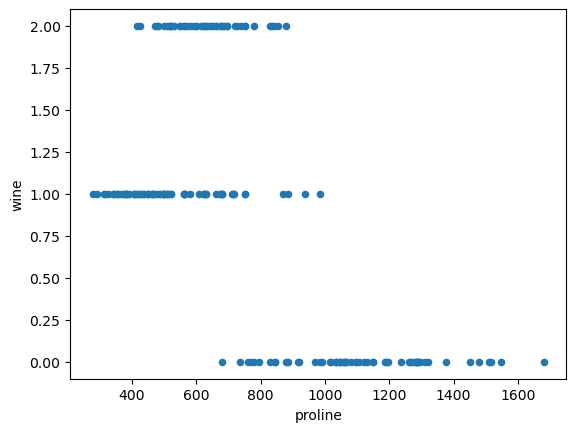

In [18]:
# explore potential correlation

df.plot(kind = 'scatter', x = 'proline', y = 'wine')

<Axes: xlabel='malic_acid', ylabel='wine'>

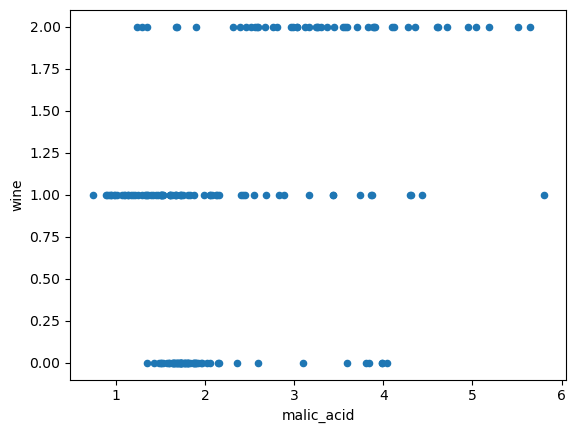

In [19]:
df.plot(kind = 'scatter', x = 'malic_acid', y = 'wine')

<Axes: xlabel='alcalinity_of_ash', ylabel='wine'>

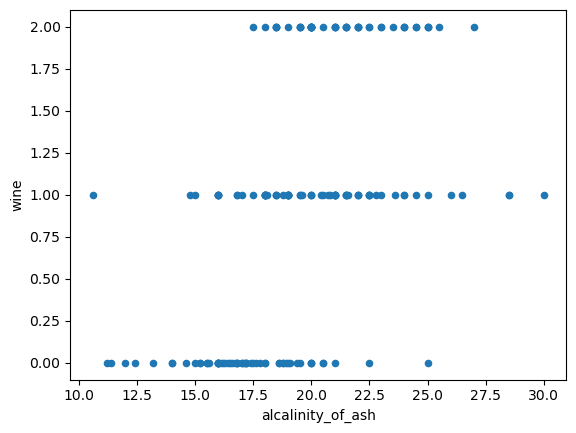

In [20]:
df.plot(kind = 'scatter', x = 'alcalinity_of_ash', y = 'wine')

<Axes: xlabel='magnesium', ylabel='wine'>

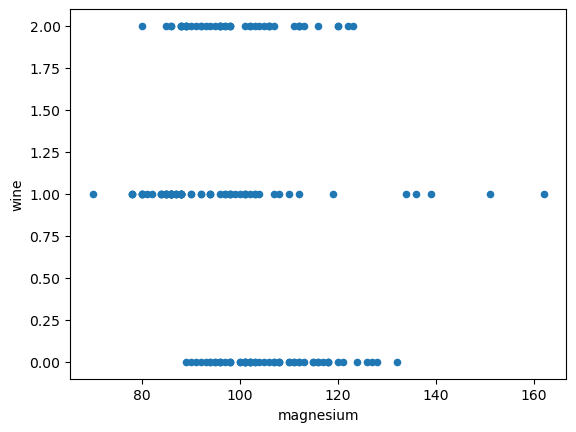

In [21]:
df.plot(kind = 'scatter', x = 'magnesium', y = 'wine')

<Axes: xlabel='flavanoids', ylabel='wine'>

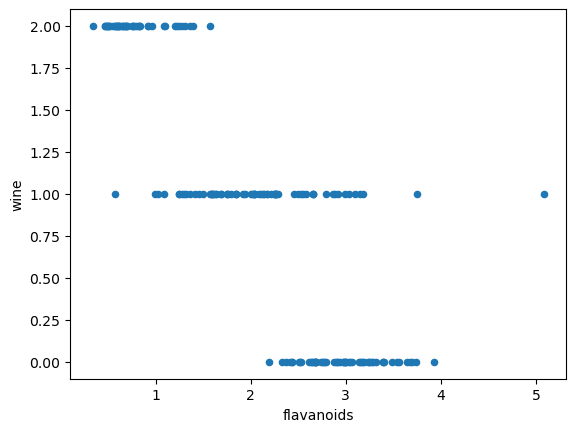

In [22]:
df.plot(kind = 'scatter', x = 'flavanoids', y = 'wine')

<Axes: xlabel='color_intensity', ylabel='wine'>

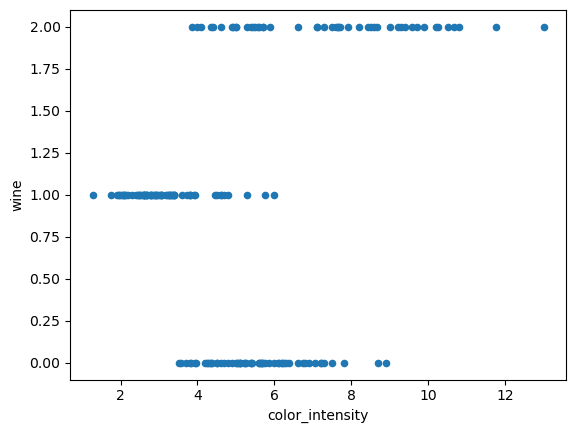

In [23]:
df.plot(kind = 'scatter', x = 'color_intensity', y = 'wine')

In [32]:
# split data into training and test sets

response = 'wine'
y = df[[response]]
y

,wine
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [34]:
x = data.data
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [36]:
# Standardize data

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# multi_class is specifying one versus rest
clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)

clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.9924812030075187
Test accuracy: 1.0


C:\Users\odellj\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
